# Personalizando visualizaciones con Matplotlib

## Datos anteriores

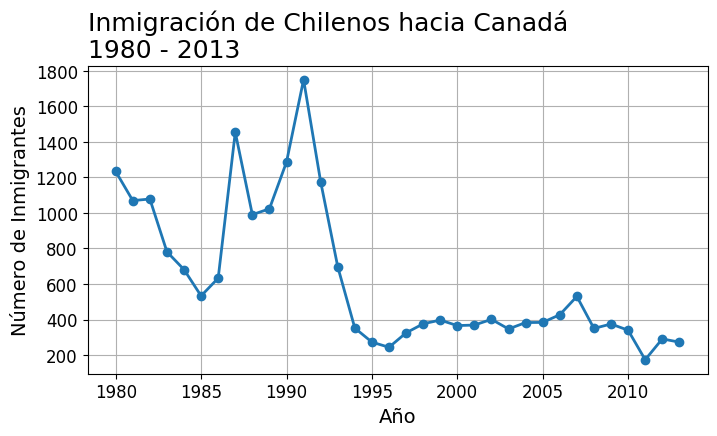

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data/Inmigrantes_Canadá.csv")
df.set_index("Pais", inplace=True)
anos = list(map(str, range(1980, 2014)))
chile = df.loc["Chile", anos]
cl_dict = {"Año": chile.index.tolist(), "Inmigrantes": chile.values.tolist()}
datos_cl = pd.DataFrame(cl_dict)

fig, ax = plt.subplots(figsize=(8, 4))
# lw -> grosor de la línea azul del gráfico
# marker -> marcadores
ax.plot(datos_cl["Año"], datos_cl["Inmigrantes"], lw=2, marker='o')

ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# cambiando tamaño fuente y ubicación del título
ax.set_title("Inmigración de Chilenos hacia Canadá\n1980 - 2013", fontsize=18, loc='left')
ax.set_xlabel("Año", fontsize=14)
ax.set_ylabel("Número de Inmigrantes", fontsize=14)

# cambiando tamaño a los ticks (rayitas)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

ax.grid()

plt.show()

## Alterando estilos

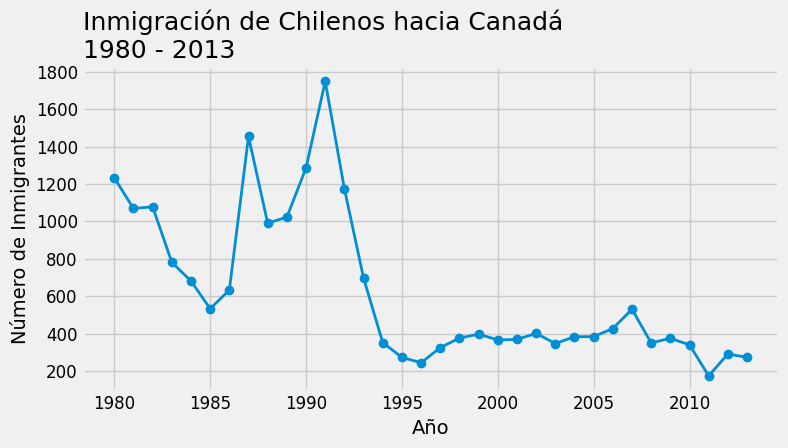

In [2]:
# evitar que estilo se aplique a todos los graficos del notebook
IPython_default = plt.rcParams.copy()

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(datos_cl["Año"], datos_cl["Inmigrantes"], lw=2, marker="o")

ax.xaxis.set_major_locator(plt.MultipleLocator(5))

ax.set_title(
    "Inmigración de Chilenos hacia Canadá\n1980 - 2013", fontsize=18, loc="left"
)
ax.set_xlabel("Año", fontsize=14)
ax.set_ylabel("Número de Inmigrantes", fontsize=14)

ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

In [3]:
# para ocupar gráficos sin el estilo recién aplicado
plt.rcParams.update(IPython_default)

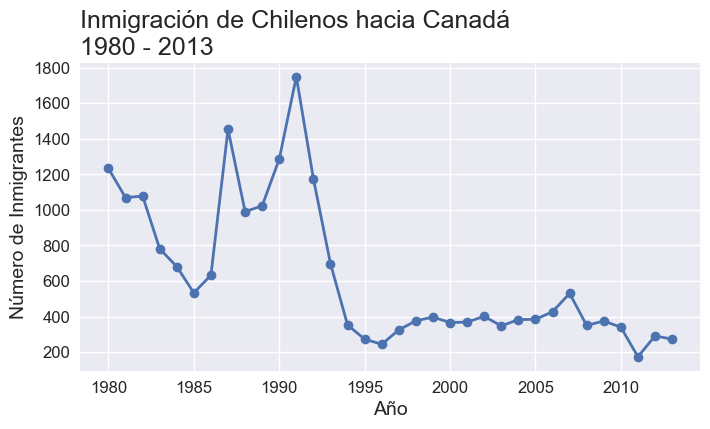

In [4]:
# Aplicar estilo solo a un bloque
with plt.style.context('seaborn-v0_8'):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(datos_cl["Año"], datos_cl["Inmigrantes"], lw=2, marker="o")
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax.set_title(
    "Inmigración de Chilenos hacia Canadá\n1980 - 2013", fontsize=18, loc="left"
)
    ax.set_xlabel("Año", fontsize=14)
    ax.set_ylabel("Número de Inmigrantes", fontsize=14)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
    plt.show()

# Alterando colores

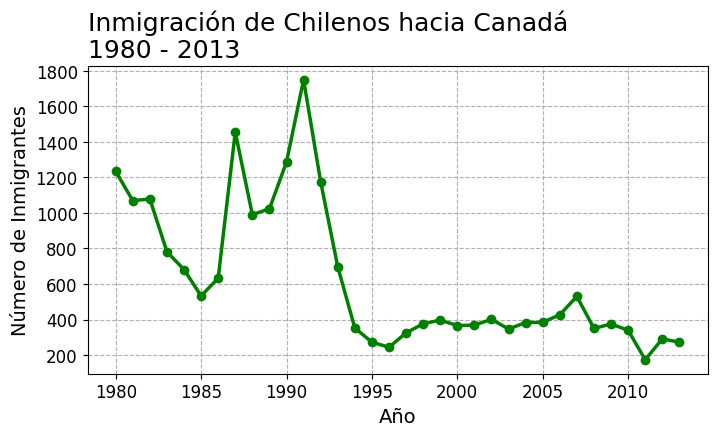

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))
# lw -> grosor de la línea azul del gráfico
# marker -> marcadores
ax.plot(datos_cl["Año"], datos_cl["Inmigrantes"], lw=2.5, marker="o", color='g')

ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# cambiando tamaño fuente y ubicación del título
ax.set_title(
    "Inmigración de Chilenos hacia Canadá\n1980 - 2013", fontsize=18, loc="left"
)
ax.set_xlabel("Año", fontsize=14)
ax.set_ylabel("Número de Inmigrantes", fontsize=14)

# cambiando tamaño a los ticks (rayitas)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

# cambiar estilo del grid
ax.grid(linestyle='--')

plt.show()

## Utilizando nuevo df

In [6]:
sudamerica = df.query('Region == "América del Sur"')
sudamerica.head()

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina y el Caribe,América del Sur,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolivia,América Latina y el Caribe,América del Sur,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina y el Caribe,América del Sur,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina y el Caribe,América del Sur,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colombia,América Latina y el Caribe,América del Sur,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088


### Graficando total de inmigrante de sudamérica

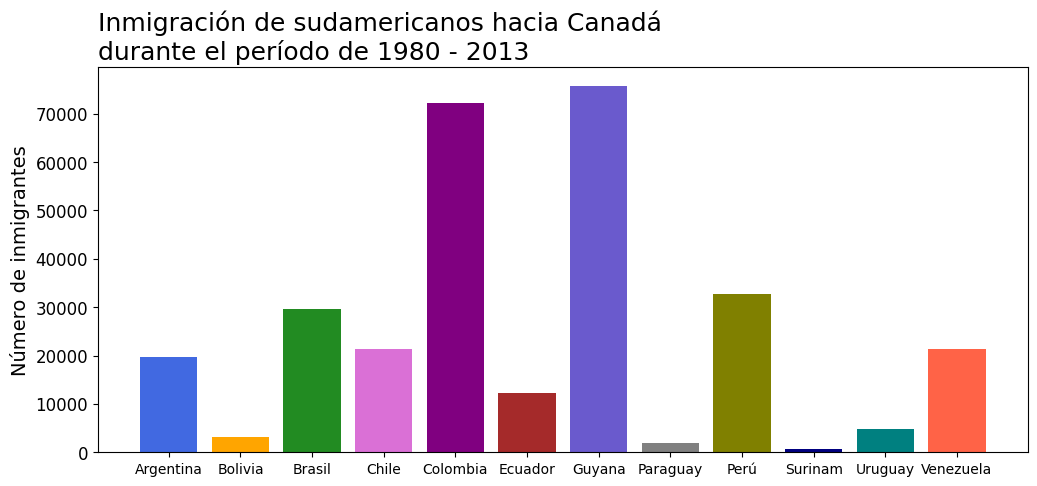

In [7]:
# listado de colores
colores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

fig, ax = plt.subplots(figsize=(12,5))

# mejor forma para graficar variables de valores (categóricas) totales es un gráfico de barras
ax.bar(sudamerica.index, sudamerica["Total"], facecolor=colores)
ax.set_title('Inmigración de sudamericanos hacia Canadá\ndurante el período de 1980 - 2013', loc='left', fontsize=18)
# dejar sin label para no sobrecargar
ax.set_xlabel('')
ax.set_ylabel('Número de inmigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

Para mejorar su lectura se pueden arreglar algunas cosas:

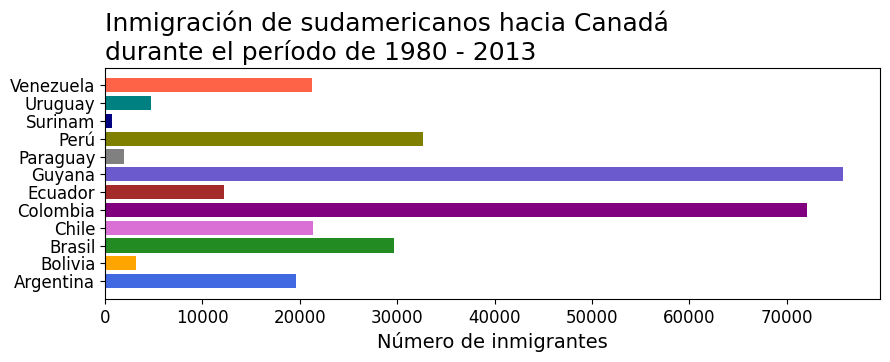

In [8]:
fig, ax = plt.subplots(figsize=(10, 3))

# cambiando a barh para barras horizontales
ax.barh(sudamerica.index, sudamerica["Total"], facecolor=colores)
ax.set_title(
    "Inmigración de sudamericanos hacia Canadá\ndurante el período de 1980 - 2013",
    loc="left",
    fontsize=18,
)
# invertir labels (por cambio a barh)
ax.set_ylabel("")
ax.set_xlabel("Número de inmigrantes", fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

In [9]:
# ordenar ascendentemente dataframe sudamerica a partir del valor 'Total' 
sudamerica_sorted = sudamerica.sort_values('Total',ascending=True)

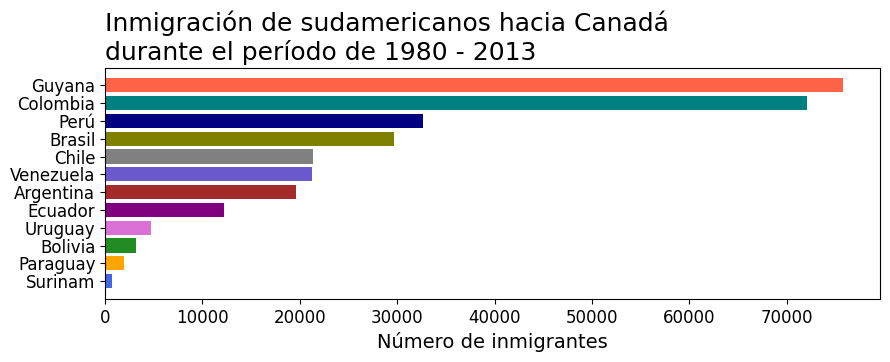

In [10]:
fig, ax = plt.subplots(figsize=(10, 3))

ax.barh(sudamerica_sorted.index, sudamerica_sorted["Total"], facecolor=colores)
ax.set_title(
    "Inmigración de sudamericanos hacia Canadá\ndurante el período de 1980 - 2013",
    loc="left",
    fontsize=18,
)
# invertir labels (por cambio a barh)
ax.set_ylabel("")
ax.set_xlabel("Número de inmigrantes", fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

Dar un color especial a Chile:

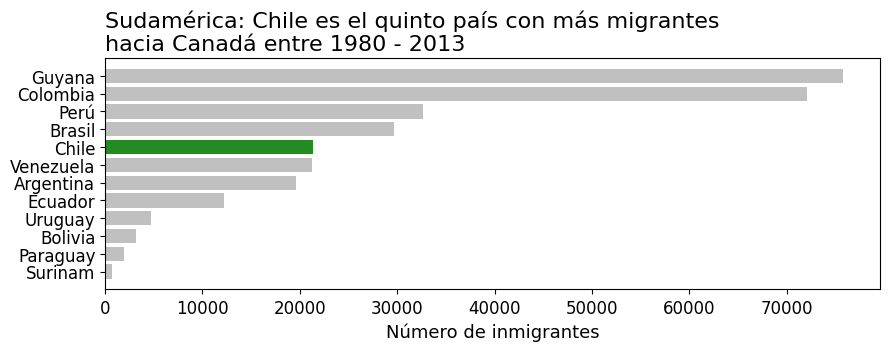

In [11]:
colores = []
for pais in sudamerica_sorted.index:
    if pais == 'Chile':
        colores.append('forestgreen')
    else:
        colores.append('silver')

fig, ax = plt.subplots(figsize=(10, 3))

ax.barh(sudamerica_sorted.index, sudamerica_sorted["Total"], facecolor=colores)
ax.set_title(
    "Sudamérica: Chile es el quinto país con más migrantes\nhacia Canadá entre 1980 - 2013",
    loc="left",
    fontsize=16,
)
# invertir labels (por cambio a barh)
ax.set_ylabel("")
ax.set_xlabel("Número de inmigrantes", fontsize=13)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

# Añadiendo anotaciones
Se podrían añadir en las barras la cantidad exacta de inmigrantes y limpiar el resto del gráfico para que no muestre detalles innecesarios o redundantes.

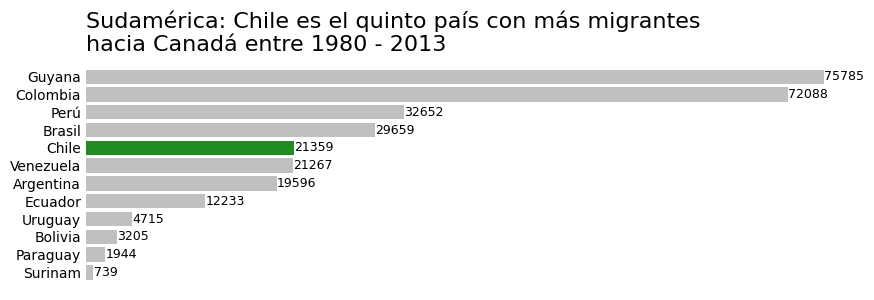

In [20]:
colores = []
for pais in sudamerica_sorted.index:
    if pais == "Chile":
        colores.append("forestgreen")
    else:
        colores.append("silver")

fig, ax = plt.subplots(figsize=(10, 3))

# quitará recuadro
ax.set_frame_on(False)

# quitar etiquetas del eje X
ax.xaxis.set_visible(False)

# quitar rayas después de las etiquetas de los países
ax.tick_params(axis='y', which='both', length=0)

ax.barh(sudamerica_sorted.index, sudamerica_sorted["Total"], facecolor=colores)
ax.set_title(
    "Sudamérica: Chile es el quinto país con más migrantes\nhacia Canadá entre 1980 - 2013",
    loc="left",
    fontsize=16,
)
# invertir labels (por cambio a barh)
ax.set_ylabel("")
ax.yaxis.set_tick_params(labelsize=10)

# Para insertar anotaciones después de la barra
for i, j in enumerate(sudamerica_sorted['Total']):
  # posición en x se le añaden 20 pixeles, y el tercer argumento será el valor total a mostrar
  # ha -> horizontal alignment, va -> vertical
  ax.text(j+20, i, str(j), color='black', fontsize=9, ha='left', va='center')

plt.show()

# Exportando gráficos

Formatos disponibles:

In [22]:
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


## Exportando gráfico de chilenos

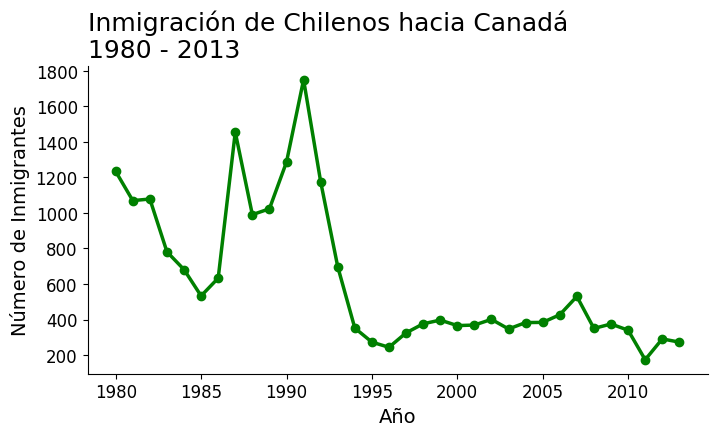

In [30]:
fig, ax = plt.subplots(figsize=(8, 4))
# lw -> grosor de la línea azul del gráfico
# marker -> marcadores
ax.plot(datos_cl["Año"], datos_cl["Inmigrantes"], lw=2.5, marker="o", color="g")

ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# cambiando tamaño fuente y ubicación del título
ax.set_title(
    "Inmigración de Chilenos hacia Canadá\n1980 - 2013", fontsize=18, loc="left"
)
ax.set_xlabel("Año", fontsize=14)
ax.set_ylabel("Número de Inmigrantes", fontsize=14)

# cambiando tamaño a los ticks (rayitas)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)


# quitando líneas del marco
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ruta, fondo transparente?, resolución, bbox_inches -> margen después del gráfico
fig.savefig("exported_data/inmigrantes_chilenos_canada.png", transparent=True, dpi=300, bbox_inches='tight')

plt.show()

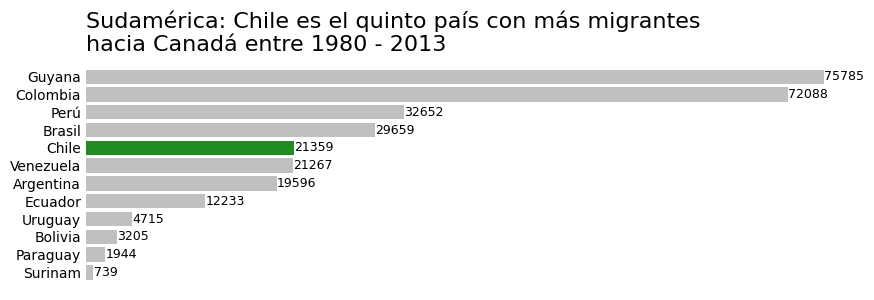

In [31]:
colores = []
for pais in sudamerica_sorted.index:
    if pais == "Chile":
        colores.append("forestgreen")
    else:
        colores.append("silver")

fig, ax = plt.subplots(figsize=(10, 3))

# quitará recuadro
ax.set_frame_on(False)

# quitar etiquetas del eje X
ax.xaxis.set_visible(False)

# quitar rayas después de las etiquetas de los países
ax.tick_params(axis="y", which="both", length=0)

ax.barh(sudamerica_sorted.index, sudamerica_sorted["Total"], facecolor=colores)
ax.set_title(
    "Sudamérica: Chile es el quinto país con más migrantes\nhacia Canadá entre 1980 - 2013",
    loc="left",
    fontsize=16,
)
# invertir labels (por cambio a barh)
ax.set_ylabel("")
ax.yaxis.set_tick_params(labelsize=10)

# Para insertar anotaciones después de la barra
for i, j in enumerate(sudamerica_sorted["Total"]):
    # posición en x se le añaden 20 pixeles, y el tercer argumento será el valor total a mostrar
    # ha -> horizontal alignment, va -> vertical
    ax.text(j + 20, i, str(j), color="black", fontsize=9, ha="left", va="center")

fig.savefig(
    "exported_data/inmigrantes_sudamericanos_canada.png",
    transparent=True,
    dpi=300,
    bbox_inches="tight",
)

plt.show()